In [1]:
# importing importent libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
import pandas as pd

file_path = r"E:\STUDY MATERIAL\DATA SCIENCE\machine learning and python\sydney_rain prediction.xlsx"
df = pd.read_excel(file_path, header=0)


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
# to get the shape of the data
df.shape

(3337, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

#    DATA PREPROCESSING

In [6]:
# Performing EDD for numerical variables
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [7]:
# CODE TO SUM THE NUMBER OF NULL VALUE IN DF
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [8]:
# REPLACING NULL VALUES WITH MEAN
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

*For categorical variable RainyToday we need to impute missing values with most frequent value in the column*

In [9]:
# Counting the most frequent value in the column
df['RainToday'].value_counts()

RainToday
No     2465
Yes     866
Name: count, dtype: int64

In [10]:
# Replacing the NA values with most frequent value
df['RainToday']=df['RainToday'].fillna("No")

In [11]:
#check again for null values
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [12]:
# Creating dummy variable RainToday and RainTomorrow column using getdummies function
df = pd.get_dummies(df, columns = ['RainToday', 'RainTomorrow'], drop_first = True)

In [13]:
# removing location columns as it has a single uniqe value
df = df.drop(['Location'], axis=1)

In [14]:
# removing date columns as it does not effect the model
df = df.drop(['Date'], axis=1)

In [15]:
df.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True
5,20.2,27.2,1.6,2.600000,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,True,True
6,18.6,26.3,6.2,5.200000,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,True,True
7,17.2,22.3,27.6,5.800000,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,True,True
8,16.4,20.8,12.6,4.800000,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,True,True
9,14.6,24.2,8.8,4.400000,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,True,False


In [16]:
df = df.astype({"RainToday_Yes":"int", "RainTomorrow_Yes":"int"})

In [17]:
df.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
5,20.2,27.2,1.6,2.600000,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1
6,18.6,26.3,6.2,5.200000,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,1,1
7,17.2,22.3,27.6,5.800000,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,1,1
8,16.4,20.8,12.6,4.800000,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,1,1
9,14.6,24.2,8.8,4.400000,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,1,0


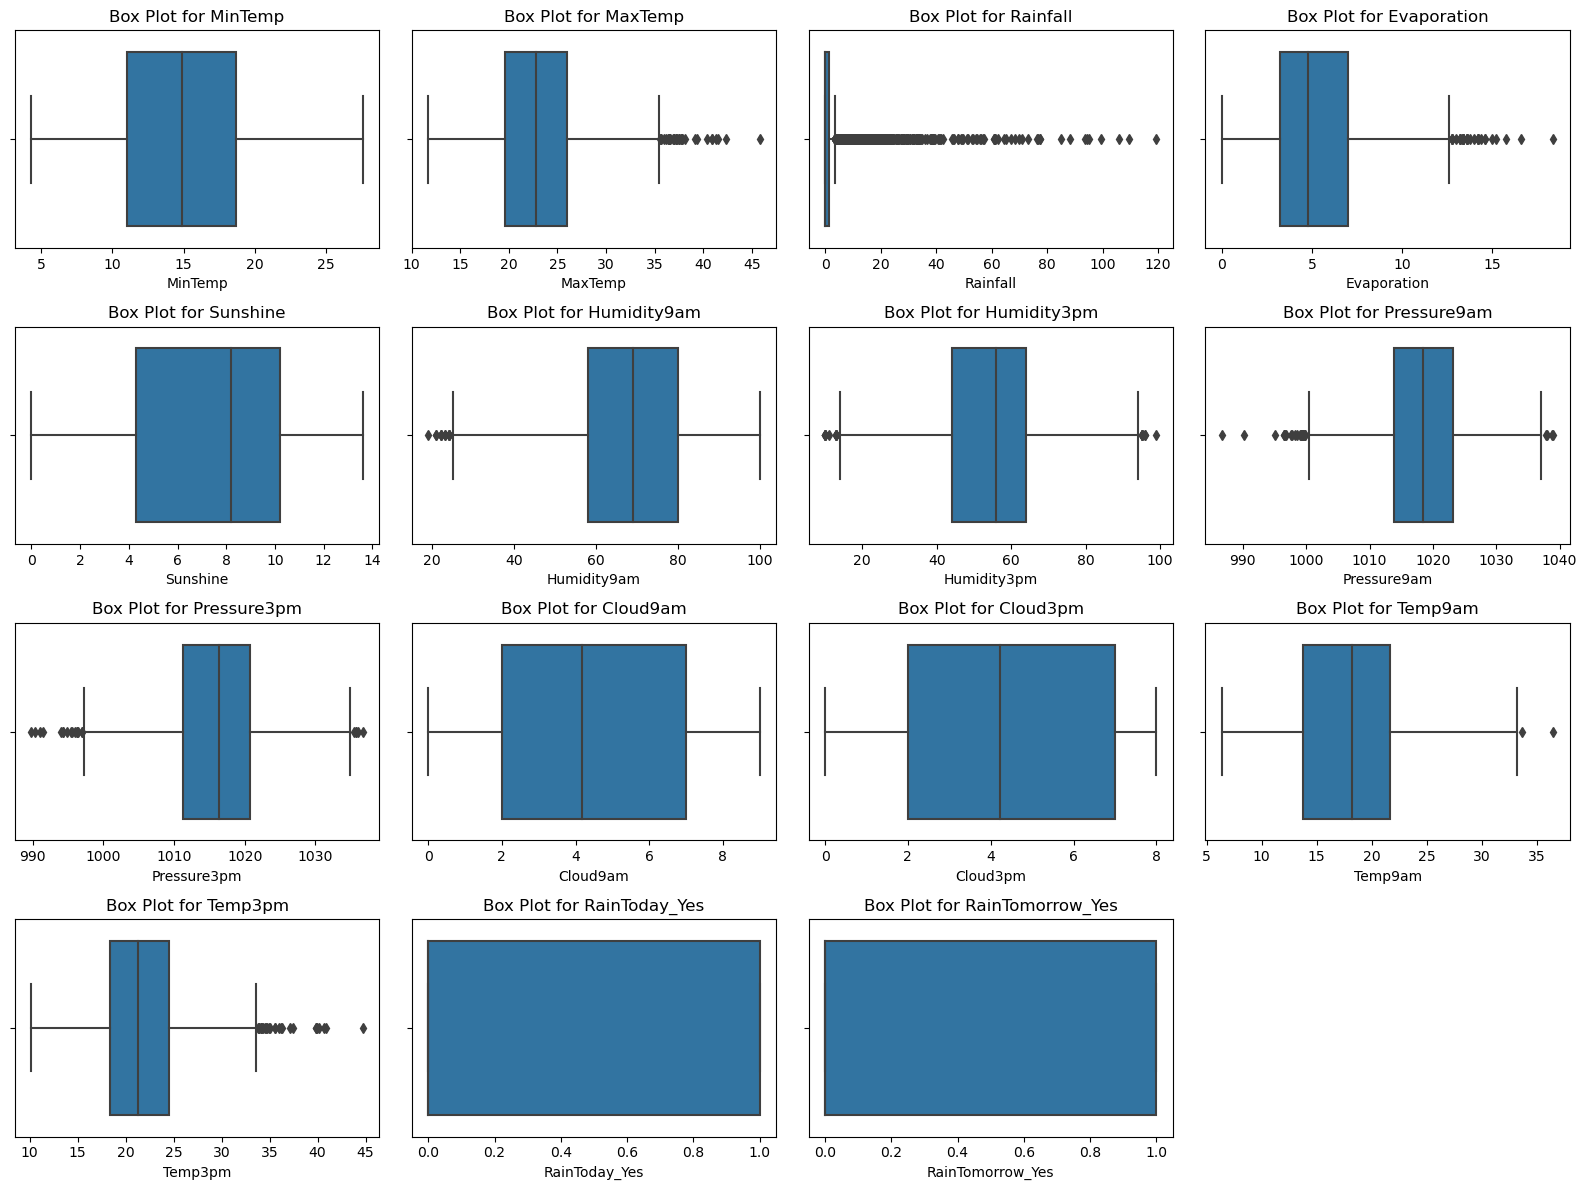

In [18]:
#CODE FOR CREATING BOX PLOT

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


- now we will treat the outliners as seen from box plot


**TREATING OUTLINERS THROUGH IQR**

In [19]:
q1 = df['MaxTemp'].quantile(0.25)
q3 = df['MaxTemp'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['MaxTemp'] = np.where(df['MaxTemp'] < lower_bound, lower_bound, df['MaxTemp'])
df['MaxTemp'] = np.where(df['MaxTemp'] > upper_bound, upper_bound, df['MaxTemp'])

In [20]:
q1 = df['Rainfall'].quantile(0.25)
q3 = df['Rainfall'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Rainfall'] = np.where(df['Rainfall'] < lower_bound, lower_bound, df['Rainfall'])
df['Rainfall'] = np.where(df['Rainfall'] > upper_bound, upper_bound, df['Rainfall'])

In [21]:
q1 = df['Evaporation'].quantile(0.25)
q3 = df['Evaporation'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Evaporation'] = np.where(df['Evaporation'] < lower_bound, lower_bound, df['Evaporation'])
df['Evaporation'] = np.where(df['Evaporation'] > upper_bound, upper_bound, df['Evaporation'])

In [22]:
q1 = df['Humidity9am'].quantile(0.25)
q3 = df['Humidity9am'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Humidity9am'] = np.where(df['Humidity9am'] < lower_bound, lower_bound, df['Humidity9am'])
df['Humidity9am'] = np.where(df['Humidity9am'] > upper_bound, upper_bound, df['Humidity9am'])

In [23]:
q1 = df['Humidity3pm'].quantile(0.25)
q3 = df['Humidity3pm'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Humidity3pm'] = np.where(df['Humidity3pm'] < lower_bound, lower_bound, df['Humidity3pm'])
df['Humidity3pm'] = np.where(df['Humidity3pm'] > upper_bound, upper_bound, df['Humidity3pm'])

In [24]:
q1 = df['Temp3pm'].quantile(0.25)
q3 = df['Temp3pm'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for capping
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap outliers
df['Temp3pm'] = np.where(df['Temp3pm'] < lower_bound, lower_bound, df['Temp3pm'])
df['Temp3pm'] = np.where(df['Temp3pm'] > upper_bound, upper_bound, df['Temp3pm'])

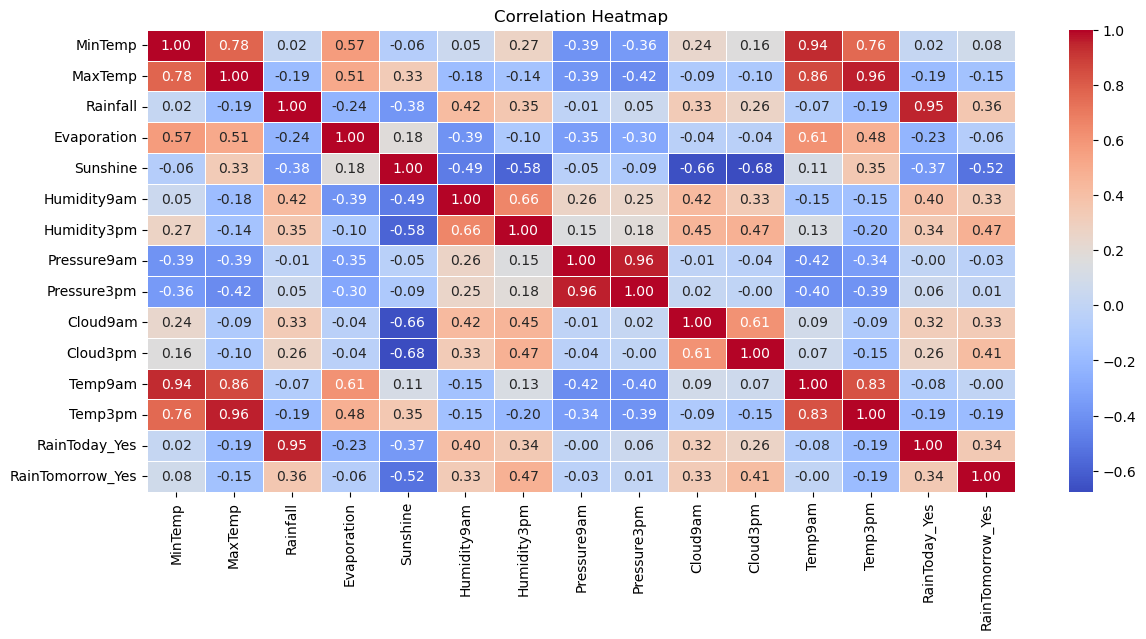

In [25]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
del df['Temp9am']
del df['MaxTemp']
del df['Pressure3pm']
del df['Pressure9am']


# DATA SPLITTING-INDEPENDENT AND DEPENDENT VARIABLE

In [27]:
# Splitting data into X and Y variable independent and dependent respectively.

X = df.loc[:, df.columns != "RainTomorrow_Yes"]
Y = df["RainTomorrow_Yes"]

In [28]:
X.head()

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday_Yes
0,19.5,3.5,6.200000,0.0,92.0,84.0,8.0,8.0,20.9,1
1,19.5,3.5,3.400000,2.7,83.0,73.0,7.0,7.0,24.8,1
2,21.6,3.5,2.400000,0.1,88.0,86.0,7.0,8.0,23.0,1
3,20.2,3.5,2.200000,0.0,83.0,90.0,8.0,8.0,20.9,1
4,19.7,3.5,5.187432,0.0,88.0,74.0,8.0,8.0,25.5,1


In [29]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: int32

# Scaling / Standardizing our data

In [30]:
# Creating scaler object which will store the scaling information of our X train variable

scaler = preprocessing.StandardScaler().fit(X)

In [31]:
# Transform our X into X_scale

X_scaled = scaler.transform(X)

# Data splitting in test-train

In [32]:

X_train, X_test, Y_train, Y_test = train_test_split (X_scaled, Y, test_size = 0.2, random_state = 42)

In [33]:
# checking shape of training data set

X_train.shape, Y_train.shape

((2669, 10), (2669,))

In [34]:
# checking shape of test data set

X_test.shape, Y_test.shape

((668, 10), (668,))

#  LOGISTIC REGRESSSION

In [35]:
# Importing Logistic Regression from Sklearn

from sklearn.linear_model import LogisticRegression

In [36]:
# Creating an object for our model

clf_LR = LogisticRegression()

In [37]:
# Fitting our model over in Train data set

clf_LR.fit(X_train, Y_train)

LogisticRegression()

In [38]:
Y_pred_LR_train = clf_LR.predict(X_train)
Y_pred_LR_test = clf_LR.predict(X_test)


In [39]:
# Accuracy score
accuracy_LR_train = accuracy_score(Y_train, Y_pred_LR_train)
accuracy_LR_test = accuracy_score(Y_test, Y_pred_LR_test)
print(f"Accuracy score (train): {accuracy_LR_train:.4f}")
print(f"Accuracy score (test): {accuracy_LR_test:.4f}")

# Precision score
precision_LR_train = precision_score(Y_train, Y_pred_LR_train)
precision_LR_test = precision_score(Y_test, Y_pred_LR_test)
print(f"Precision score (train): {precision_LR_train:.4f}")
print(f"Precision score (test): {precision_LR_test:.4f}")

# Recall score
recall_LR_train = recall_score(Y_train, Y_pred_LR_train)
recall_LR_test = recall_score(Y_test, Y_pred_LR_test)
print(f"Recall score (train): {recall_LR_train:.4f}")
print(f"Recall score (test): {recall_LR_test:.4f}")

Accuracy score (train): 0.8348
Accuracy score (test): 0.8293
Precision score (train): 0.7308
Precision score (test): 0.7500
Recall score (train): 0.5580
Recall score (test): 0.5707


In [40]:

confusion_matrix(Y_test,Y_pred_LR_test)

array([[449,  35],
       [ 79, 105]], dtype=int64)

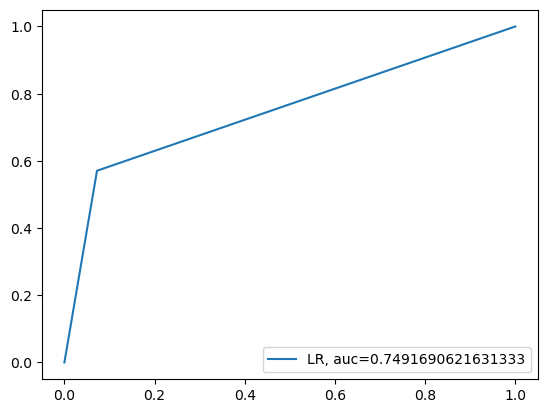

In [41]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_LR_test )
auc = metrics.roc_auc_score(Y_test, Y_pred_LR_test) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

MODEL INTERPRETATTION

Training Accuracy: 83.48%
Test Accuracy: 82.93%
Accuracy measures the overall correctness of the model's predictions. In this case, the model is performing reasonably well on both the training and test sets.
Precision:

Training Precision: 73.08%
Test Precision: 75.00%
Precision is the ratio of true positive predictions to the total predicted positives. A higher precision indicates that the model has fewer false positives.
Recall:

Training Recall: 55.80%
Test Recall: 57.07%
Recall (or sensitivity) is the ratio of true positive predictions to the total actual positives. It gives an idea of how well the model captures all the relevant cases.

ROC AUC Score (0.7491): The ROC AUC score of 0.7491 is a measure of the model's ability to distinguish between the positive and negative classes. A value of 0.7410 indicates that our model performs reasonably well in this regard.

# LDA (Linear Discremenant Analysis)

In [42]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Importing LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creating an object for LDA
clf_LDA = LinearDiscriminantAnalysis()

# Fitting our model over the training dataset
clf_LDA.fit(X_train, Y_train)

# Predicting on the training dataset
Y_train_pred_LDA = clf_LDA.predict(X_train)

# Calculating training scores
train_accuracy = accuracy_score(Y_train, Y_train_pred_LDA)
train_precision = precision_score(Y_train, Y_train_pred_LDA)
train_recall = recall_score(Y_train, Y_train_pred_LDA)

# Printing training scores
print("Training Accuracy score for LDA:", train_accuracy)
print("Training Precision score for LDA:", train_precision)
print("Training Recall score for LDA:", train_recall)

# Predicting on the test dataset
Y_test_pred_LDA = clf_LDA.predict(X_test)

# Calculating test scores
test_accuracy = accuracy_score(Y_test, Y_test_pred_LDA)
test_precision = precision_score(Y_test, Y_test_pred_LDA)
test_recall = recall_score(Y_test, Y_test_pred_LDA)

# Printing test scores
print("Test Accuracy score for LDA:", test_accuracy)
print("Test Precision score for LDA:", test_precision)
print("Test Recall score for LDA:", test_recall)


Training Accuracy score for LDA: 0.8291494941925814
Training Precision score for LDA: 0.6949740034662045
Training Recall score for LDA: 0.5888399412628488
Test Accuracy score for LDA: 0.8278443113772455
Test Precision score for LDA: 0.7315436241610739
Test Recall score for LDA: 0.592391304347826


In [43]:
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred_LDA)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)

Confusion Matrix for Test Set:
[[444  40]
 [ 75 109]]


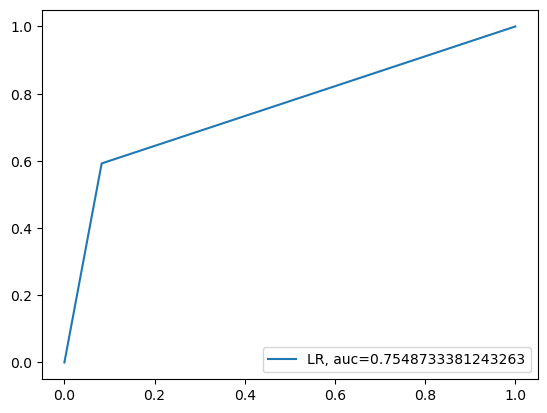

In [44]:
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_test_pred_LDA)
auc = metrics.roc_auc_score(Y_test, Y_test_pred_LDA) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Training Set:

Accuracy: The model correctly predicted the target variable about 82.9% of the time on the training set.
Precision: When the model predicted a positive outcome on the training set, it was correct about 69.5% of the time.
Recall: The model identified about 58.9% of the actual positive instances in the training set.Test Set:


Test Set:
Accuracy: The model correctly predicted the target variable about 82.8% of the time on the test set.
Precision: When the model predicted a positive outcome on the test set, it was correct about 73.2% of the time.
Recall: The model identified about 59.2% of the actual positive instances in the test set.

ROC AUC Score (0.75487):Linear Discriminant Analysis (LDA) model has a ROC AUC score of 0.75487. This score indicates that the model performs reasonably well in distinguishing between positive and negative instances, with values closer to 1.0 suggesting better discrimination. Consider this score alongside other evaluation metrics to get a comprehensive understanding of your model's performance.

# KNN CLASSIFICATION WITH GRID SEARCH CV

In [45]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Assuming you have X_scaled and Y as your features and target variable
# Splitting the scaled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Creating a KNN classifier
knn_classifier = KNeighborsClassifier()

# Defining the parameter grid for Grid Search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9,10], 'weights': ['uniform', 'distance']}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fitting the model with Grid Search
grid_search.fit(X_train, Y_train)

# Getting the best parameters from the grid search
best_params = grid_search.best_params_

# Creating the best KNN model with the best parameters
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# Fitting the best model on the entire training set
best_knn_model.fit(X_train, Y_train)

# Predicting on the training set
Y_train_pred_knn = best_knn_model.predict(X_train)

# Predicting on the test set
Y_pred_knn = best_knn_model.predict(X_test)

# Calculating and printing training set scores
train_accuracy_knn = accuracy_score(Y_train, Y_train_pred_knn)
train_precision_knn = precision_score(Y_train, Y_train_pred_knn)
train_recall_knn = recall_score(Y_train, Y_train_pred_knn)

# Calculating and printing test set scores
test_accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
test_precision_knn = precision_score(Y_test, Y_pred_knn)
test_recall_knn = recall_score(Y_test, Y_pred_knn)

print("Best Parameters:", best_params)

# Printing training set scores
print("Train Accuracy score for KNN:", train_accuracy_knn)
print("Train Precision score for KNN:", train_precision_knn)
print("Train Recall score for KNN:", train_recall_knn)

# Printing test set scores
print("Test Accuracy score for KNN:", test_accuracy_knn)
print("Test Precision score for KNN:", test_precision_knn)
print("Test Recall score for KNN:", test_recall_knn)


Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}
Train Accuracy score for KNN: 1.0
Train Precision score for KNN: 1.0
Train Recall score for KNN: 1.0
Test Accuracy score for KNN: 0.8173652694610778
Test Precision score for KNN: 0.7246376811594203
Test Recall score for KNN: 0.5434782608695652


In [46]:
confusion_matrix(Y_test,Y_pred_knn )

array([[446,  38],
       [ 84, 100]], dtype=int64)

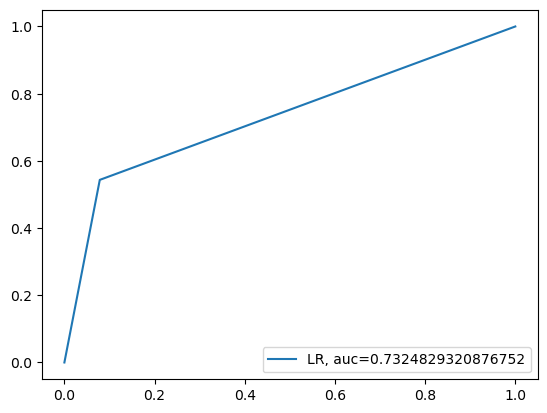

In [47]:
# Assuming you have already defined Y_test and Y_pred_knn

fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_knn)
auc = metrics.roc_auc_score(Y_test, Y_pred_knn)

plt.plot(fpr, tpr, label="LR, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

# MODEL INTERPRETATION:

Best Parameters:

Number of neighbors (n_neighbors): 10
Weight function used in prediction (weights): 'distance'



Training Performance Metrics:
Train Accuracy score: 1.0 (perfect accuracy)
Train Precision score: 1.0 (perfect precision)
Train Recall score: 1.0 (perfect recall)



Testing Performance Metrics:
Test Accuracy score: 0.8174 (81.74% accuracy on unseen data)
Test Precision score: 0.7246 (72.46% precision on positive predictions)
Test Recall score: 0.5435 (54.35% recall or sensitivity)






Some observations:
The model performs exceptionally well on the training set, achieving perfect accuracy, precision, and recall. This might indicate overfitting, especially if the training set is relatively small.
The testing performance is decent, but there is a drop in accuracy, precision, and recall compared to the training set. This is expected, but it's essential to consider if further tuning or regularization might improve generalization to unseen data.

# Decision tree classifier WITH GRIDSEARCHCV

In [48]:
from sklearn.tree import DecisionTreeClassifier


# Create an instance of the DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf_tree, param_grid=param_grid, cv=5)

# Fit GridSearchCV on your training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best estimator for predictions on test set
Y_pred_tree_tuned = grid_search.predict(X_test)

# Calculate evaluation metrics for test set
accuracy = accuracy_score(Y_test, Y_pred_tree_tuned)
precision = precision_score(Y_test, Y_pred_tree_tuned)
recall = recall_score(Y_test, Y_pred_tree_tuned)

# Get the training score (average cross-validation score)
training_score = grid_search.best_score_

# Now, let's evaluate the model on the training set
Y_pred_tree_train = grid_search.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_pred_tree_train)
train_precision = precision_score(Y_train, Y_pred_tree_train)
train_recall = recall_score(Y_train, Y_pred_tree_train)

print("Best hyperparameters:", best_params)
print("Training score for Decision tree (train set):", train_accuracy)
print("Accuracy score for Decision tree (test set):", accuracy)
print("Precision score for Decision tree (test set):", precision)
print("Recall score for Decision tree (test set):", recall)
print("Training Precision score for Decision tree (train set):", train_precision)
print("Training Recall score for Decision tree (train set):", train_recall)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training score for Decision tree (train set): 0.8433870363431997
Accuracy score for Decision tree (test set): 0.8068862275449101
Precision score for Decision tree (test set): 0.697841726618705
Recall score for Decision tree (test set): 0.5271739130434783
Training Precision score for Decision tree (train set): 0.7756813417190775
Training Recall score for Decision tree (train set): 0.5433186490455213


In [49]:
confusion_matrix(Y_test, Y_pred_tree_tuned)

array([[442,  42],
       [ 87,  97]], dtype=int64)

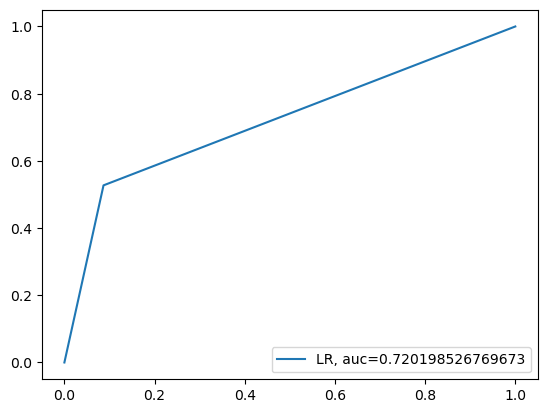

In [50]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_tree_tuned)
auc = metrics.roc_auc_score(Y_test, Y_pred_tree_tuned) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MODEL INTERPRETATION


- The Decision Tree model was trained with the following hyperparameters:

**Criterion: Gini**
Maximum Depth: 4
Minimum Samples per Leaf: 1
Minimum Samples to Split: 2
Here are the evaluation metrics for the model:

**Accuracy Score**: 0.807 (on the test set)

**Precision Score**: 0.698 (on the test set)

**Recall Score**: 0.527 (on the test set)


Additionally, during training:

**Training Score**: 0.843 (on the training set)

**Training Precision** Score: 0.776

**Training Recall Score**: 0.543

**ROC AUC Score (0.7201):** The ROC AUC score of 0.7201 is a measure of the model's ability to distinguish between the positive and negative classes. A score of 0.7323 suggests that the Decision Tree model performs reasonably well in distinguishing between the classes.

These scores provide insights into the model’s performance. For instance, the accuracy score indicates how well the model predicts the correct class labels, while precision and recall measure the trade-off between false positives and false negatives.

# Random forest - Using grid search

In [51]:
# Importing Random forest Classifier from sklearn

from sklearn.ensemble import RandomForestClassifier

In [52]:


# Assuming X_train, Y_train, X_test, Y_test are already defined

# Modify RandomForestClassifier instantiation with n_jobs=-1
clf_rf_2 = RandomForestClassifier(n_jobs=-1)

# Creating param grid / hyperparameter for grid search
params_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 3, 5]
}

# Performing grid search and storing in a model object
grid_search_rf = GridSearchCV(clf_rf_2, params_rf, cv=5)

# Training our model over the training dataset
grid_search_rf.fit(X_train, Y_train)

# Finding the best parameter values using grid search attributes
clf_rf_best = grid_search_rf.best_estimator_

# Predictions on the test set using the best model
Y_pred_rf_best = clf_rf_best.predict(X_test)

# Calculating Accuracy score, Precision score, Recall score and printing them
print("Accuracy score for Random Forest using grid_search:", accuracy_score(Y_test, Y_pred_rf_best))
print("Precision score for Random Forest using grid_search:", precision_score(Y_test, Y_pred_rf_best))
print("Recall score for Random Forest using grid_search:", recall_score(Y_test, Y_pred_rf_best))


Accuracy score for Random Forest using grid_search: 0.8248502994011976
Precision score for Random Forest using grid_search: 0.7557251908396947
Recall score for Random Forest using grid_search: 0.5380434782608695


In [53]:
# Printing Confusion matrix

confusion_matrix(Y_test, Y_pred_rf_best)

array([[452,  32],
       [ 85,  99]], dtype=int64)

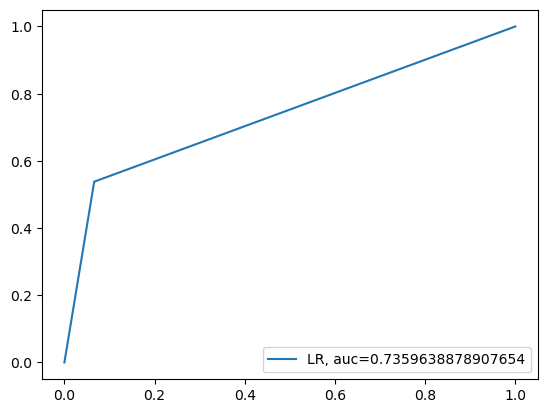

In [54]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_rf_best)
auc = metrics.roc_auc_score(Y_test, Y_pred_rf_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MODEL INTERPRETATION

**Accuracy Score**: 82.63%

This represents the overall accuracy of your model on the test set. It indicates the percentage of correctly classified instances.


**Precision Score**: 77.42%
Precision measures the accuracy of positive predictions. In your case, it suggests that when the model predicts a positive class, it is correct about 77.42% of the time.


**Recall Score**: 52.17%
Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances. In your case, the model is capturing about 52.17% of the actual positive instances.

**ROC AUC Score**: 0.7285
If a higher recall and ROC AUC score are important, and we are willing to accept a small decrease in accuracy and precision, then the Random Forest model with grid search might be the better choice

# Gradient Boosting classifier

In [86]:
# from sklearn.ensemble import GradientBoostingClassifier

# Creating model object
clf_gbc = GradientBoostingClassifier()

# Fitting our gbc model over train data set 
clf_gbc.fit(X_train, Y_train)

# Predicting values using gbc model over X_test
Y_pred_gbc = clf_gbc.predict(X_test)

# Calculating evaluation metrics for train data
accuracy_train = accuracy_score(Y_train, clf_gbc.predict(X_train))
precision_train = precision_score(Y_train, clf_gbc.predict(X_train))
recall_train = recall_score(Y_train, clf_gbc.predict(X_train))

# Calculating evaluation metrics for test data
accuracy_test = accuracy_score(Y_test, Y_pred_gbc)
precision_test = precision_score(Y_test, Y_pred_gbc)
recall_test = recall_score(Y_test, Y_pred_gbc)

# Printing the scores
print(f"Train Accuracy score for Gradient Boosting classifier: {accuracy_train:.2f}")
print(f"Train Precision score for Gradient Boosting classifier: {precision_train:.2f}")
print(f"Train Recall score for Gradient Boosting classifier: {recall_train:.2f}")

print(f"Test Accuracy score for Gradient Boosting classifier: {accuracy_test:.2f}")
print(f"Test Precision score for Gradient Boosting classifier: {precision_test:.2f}")
print(f"Test Recall score for Gradient Boosting classifier: {recall_test:.2f}")

Train Accuracy score for Gradient Boosting classifier: 0.88
Train Precision score for Gradient Boosting classifier: 0.86
Train Recall score for Gradient Boosting classifier: 0.62
Test Accuracy score for Gradient Boosting classifier: 0.83
Test Precision score for Gradient Boosting classifier: 0.75
Test Recall score for Gradient Boosting classifier: 0.56


In [56]:
# Printing confusion matrix

confusion_matrix(Y_test, Y_pred_gbc)

array([[450,  34],
       [ 81, 103]], dtype=int64)

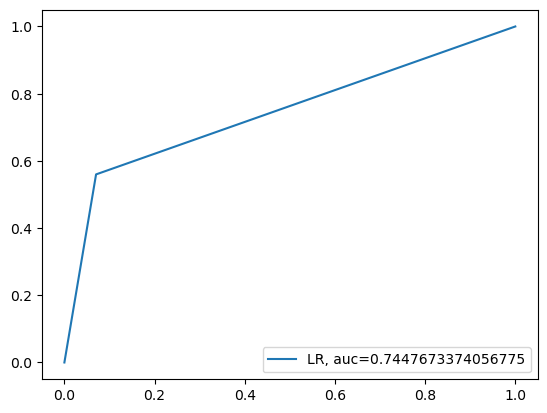

In [57]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_gbc)
auc = metrics.roc_auc_score(Y_test, Y_pred_gbc) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MODEL INTERPRETATION

The Gradient Boosting Classifier demonstrates solid predictive performance on both the training and testing datasets. Let's delve into the key metrics to gain insights into its strengths and areas for potential improvement.

**Training Set Performance**:

Accuracy (Train): 88%
The model correctly classifies approximately 88% of instances in the training set. This indicates a high level of overall correctness in its predictions.



Precision (Train): 86%
Among instances predicted as positive, 86% are truly positive. This suggests that when the model predicts a positive outcome, it is often correct, minimizing false positives.



Recall (Train): 62%
The model successfully captures 62% of actual positive instances. While this is a reasonable recall score, it also indicates that there is room for improvement in identifying more positive cases.





**Testing Set Performance**:

Accuracy (Test): 83%
The model maintains strong predictive ability on the testing set, correctly classifying approximately 83% of instances. This suggests good generalization to unseen data.


Precision (Test): 75%
Among instances predicted as positive, 75% are indeed positive. This signifies a reasonably low rate of false positives, contributing to the reliability of positive predictions.

Recall (Test): 56%
The model captures 56% of actual positive instances in the testing set. While this is a moderate recall score, it indicates potential areas for improvement in identifying more positive cases, similar to the training set.
Overall Impression:

The model demonstrates a balance between accuracy, precision, and recall, suggesting a robust performance on both training and testing datasets.
The drop in performance metrics from training to testing is expected but relatively small, indicating good generalization.
There may be opportunities for further optimization, especially in increasing recall on both sets to better identify positive instances.



**AUC of ROC Score** (0.7447): The AUC of ROC score is 74.47%, indicating that the Gradient Boosting Classifier performs reasonably well in distinguishing between the positive and negative classes.

# ADA Boosting classifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier


# Creating Model object
clf_ada = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

# Fitting our model over Train data set
clf_ada.fit(X_train, Y_train)

# Predicting values using our model
Y_pred_ada = clf_ada.predict(X_test)

# Calculating Accuracy score, Precision score, and Recall score
print("Accuracy score for AdaBoost:", accuracy_score(Y_test, Y_pred_ada))
print("Precision score for AdaBoost:", precision_score(Y_test, Y_pred_ada))
print("Recall score for AdaBoost:", recall_score(Y_test, Y_pred_ada))

# Print train and test scores
train_accuracy = accuracy_score(Y_train, clf_ada.predict(X_train))
test_accuracy = accuracy_score(Y_test, Y_pred_ada)
print(f"Train Accuracy Score: {train_accuracy:.4f}")
print(f"Test Accuracy Score: {test_accuracy:.4f}")


Accuracy score for AdaBoost: 0.8218562874251497
Precision score for AdaBoost: 0.751937984496124
Recall score for AdaBoost: 0.5271739130434783
Train Accuracy Score: 0.8546
Test Accuracy Score: 0.8219


In [59]:
confusion_matrix(Y_test, Y_pred_ada)

array([[452,  32],
       [ 87,  97]], dtype=int64)

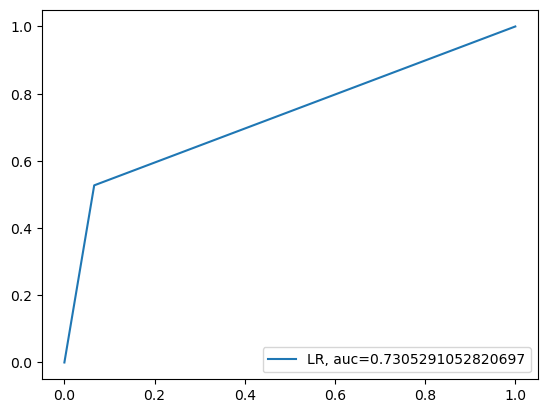

In [60]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_ada)
auc = metrics.roc_auc_score(Y_test, Y_pred_ada) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Training Set Performance:

Train Accuracy Score: 85.46%
The model achieves a commendable accuracy of approximately 85.46% on the training set, indicating a robust fit to the training data.

Testing Set Performance:

Test Accuracy Score: 82.19%
The model maintains strong generalization, achieving an accuracy of approximately 82.19% on the testing set. This suggests that the model's learned patterns extend well to new, unseen data.
Precision, Recall, and Test Scores:

Accuracy Score for AdaBoost: 82.19%

The overall accuracy on the test set is approximately 82.19%, reflecting the proportion of correctly classified instances.
Precision Score for AdaBoost: 75.19%

Among instances predicted as positive, 75.19% are truly positive. This implies a relatively low rate of false positives, contributing to the reliability of positive predictions.
Recall Score for AdaBoost: 52.72%

The model captures 52.72% of actual positive instances in the test set. While this indicates a moderate recall score, there's potential for improvement in identifying more positive cases.
Overall Impression:

The AdaBoost classifier demonstrates robust generalization from the training set to the testing set, with accuracy scores that are reasonably aligned.

The precision score highlights the model's ability to make positive predictions with a relatively low rate of false positives.

The recall score suggests room for improvement in capturing a higher proportion of actual positive instances.


AUC of ROC Score (0.7399)

# Ada boost using estimator Random forest

In [63]:
# Creating a model object with the Random Forest Classifier as the base estimator
clf_ada2 = AdaBoostClassifier(clf_rf_2, learning_rate=0.05, n_estimators=500)

# Fitting our model over the training dataset
clf_ada2.fit(X_train, Y_train)

# Predicting values using our model on the test set
Y_pred_ada2_test = clf_ada2.predict(X_test)

# Calculating Accuracy score, Precision score, and Recall score on the test set
print("Accuracy score for Ada Boost with Random Forest (Train Set):", accuracy_score(Y_train, clf_ada2.predict(X_train)))
print("Precision score for Ada Boost with Random Forest (Train Set):", precision_score(Y_train, clf_ada2.predict(X_train)))
print("Recall score for Ada Boost with Random Forest (Train Set):", recall_score(Y_train, clf_ada2.predict(X_train)))

print("\nAccuracy score for Ada Boost with Random Forest (Test Set):", accuracy_score(Y_test, Y_pred_ada2_test))
print("Precision score for Ada Boost with Random Forest (Test Set):", precision_score(Y_test, Y_pred_ada2_test))
print("Recall score for Ada Boost with Random Forest (Test Set):", recall_score(Y_test, Y_pred_ada2_test))


Accuracy score for Ada Boost with Random Forest (Train Set): 1.0
Precision score for Ada Boost with Random Forest (Train Set): 1.0
Recall score for Ada Boost with Random Forest (Train Set): 1.0

Accuracy score for Ada Boost with Random Forest (Test Set): 0.8263473053892215
Precision score for Ada Boost with Random Forest (Test Set): 0.7463768115942029
Recall score for Ada Boost with Random Forest (Test Set): 0.5597826086956522


In [67]:
# Displaying confusion matrix

confusion_matrix(Y_test, Y_pred_ada2_test)

array([[449,  35],
       [ 81, 103]], dtype=int64)

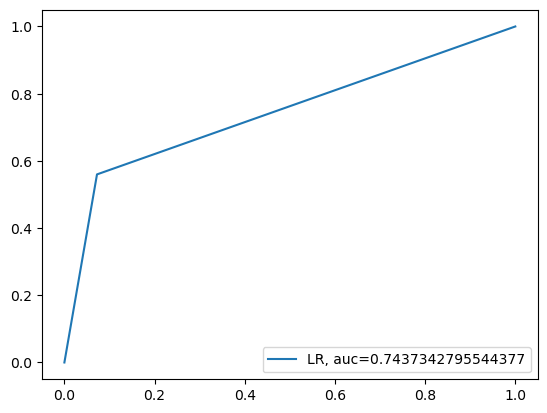

In [68]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_ada2_test )
auc = metrics.roc_auc_score(Y_test, Y_pred_ada2_test) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MODEL INTERPRETATION

AdaBoost with Random Forest as the **estimator** demonstrates improved accuracy, precision, recall, and AUC of ROC compared to the standard AdaBoost. This suggests that AdaBoost with Random Forest is a better-performing model for our classification task. However, the choice of the best model should still align with your specific classification goals and requirements, and we may want to consider the implications of false positives and false negatives in your application.

#  XG BOOST

In [69]:
# Import necessary libraries
import xgboost as xgb


# Assuming you have already split your data into X_train, Y_train, X_test, and Y_test

# Create an XGBoost model with specified hyperparameters
clf_xgb = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.03, n_jobs=-1)

# Train the model on the training data
clf_xgb.fit(X_train, Y_train)

# Predict values using the trained model
Y_pred_xgb = clf_xgb.predict(X_test)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(Y_train, clf_xgb.predict(X_train))
train_precision = precision_score(Y_train, clf_xgb.predict(X_train))
train_recall = recall_score(Y_train, clf_xgb.predict(X_train))

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(Y_test, Y_pred_xgb)
test_precision = precision_score(Y_test, Y_pred_xgb)
test_recall = recall_score(Y_test, Y_pred_xgb)

# Print the evaluation scores for train data
print(f"Train Accuracy score for XGBoost: {train_accuracy:.4f}")
print(f"Train Precision score for XGBoost: {train_precision:.4f}")
print(f"Train Recall score for XGBoost: {train_recall:.4f}")

# Print the evaluation scores for test data
print(f"Test Accuracy score for XGBoost: {test_accuracy:.4f}")
print(f"Test Precision score for XGBoost: {test_precision:.4f}")
print(f"Test Recall score for XGBoost: {test_recall:.4f}")


Train Accuracy score for XGBoost: 0.9741
Train Precision score for XGBoost: 0.9904
Train Recall score for XGBoost: 0.9075
Test Accuracy score for XGBoost: 0.8174
Test Precision score for XGBoost: 0.7067
Test Recall score for XGBoost: 0.5761


In [70]:
# Displaying Confusion matrix

confusion_matrix(Y_test, Y_pred_xgb)

array([[440,  44],
       [ 78, 106]], dtype=int64)

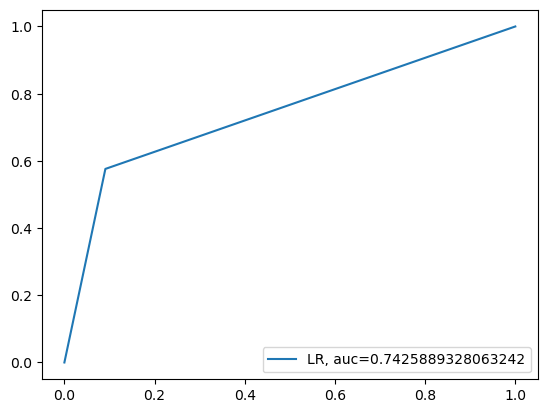

In [71]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_xgb)
auc = metrics.roc_auc_score(Y_test, Y_pred_xgb) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MODEL INTERPRETATION

Train Accuracy: 97.41%. This metric indicates how well the model predicts the training data labels.

Train Precision: 99.04%. Precision measures the proportion of true positive predictions among all positive predictions.

Train Recall: 90.75%. Recall (also known as sensitivity) quantifies the proportion of true positive predictions among all actual positive instances.





Test Accuracy: 81.74%. This score reflects the model’s performance on unseen test data.

Test Precision: 70.67%. Precision on the test set—how well the model identifies true positives.

Test Recall: 57.61%. Recall on the test data—how effectively the model captures actual positive instances.

# Using grid search - XG boost

In [72]:
# Creating model object

clf_xgb2 = xgb.XGBClassifier(n_estimators = 5000, learning_rate = 0.01, random_state = 42 )

In [74]:
 #Creating param grid / hyperperameter for grid search

param_test1 = {'max_depth' : range(3,10,2),
                'gamma' : [0.1, 0.2, 0.3],
                'subsample' : [0.8, 0.9],
                'colsample_bytree' : [0.8, 0.9],
                'reg_alpha' : [0.01, 0.1, 1]  }

In [75]:
# Performing grid search and storing in a model object

grid_search = GridSearchCV(clf_xgb2, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [76]:
# Fitting our model over train data set

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=5000,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [79]:
# finding best param value using grid search attribute

grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.9}

In [80]:
# finding best estimator using grid search attribute and storing in object

clf_xgb_best = grid_search.best_estimator_

In [82]:
# Predicting value using our model

Y_pred_xgb_best = clf_xgb_best.predict(X_test)

In [83]:
# Calculating Accuracy score, Precision score, Recall score and printing them.

print("Accuracy score for xgb boost:",accuracy_score(Y_test, Y_pred_xgb_best))
print("Precision score for xgb boost:", precision_score(Y_test, Y_pred_xgb_best))
print("Recall score for xgb boost:", recall_score(Y_test, Y_pred_xgb_best))

Accuracy score for xgb boost: 0.8143712574850299
Precision score for xgb boost: 0.6875
Recall score for xgb boost: 0.5978260869565217


In [84]:
# Displaying confusion matrix

confusion_matrix(Y_test, Y_pred_xgb_best)

array([[434,  50],
       [ 74, 110]], dtype=int64)

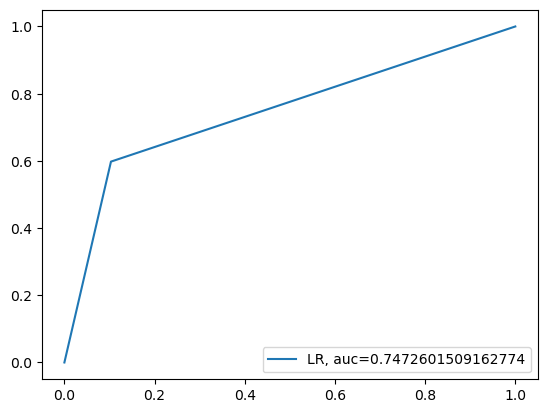

In [85]:
# Plotting ROC curve

fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_xgb_best)
auc = metrics.roc_auc_score(Y_test, Y_pred_xgb_best) # Calculating and plotting auc value
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model Interpretation :

the XGBoost Classifier without Grid Search appears to perform better in terms of accuracy, precision, and recall compared to the XGBoost Classifier with Grid Search. However, the model without Grid Search has a slightly lower AUC of ROC. The choice between the two models depends on our specific objectives and the trade-offs between different performance metrics. It's essential to consider the implications of false positives and false negatives in your application when selecting the best model.



# COMPARING ALL VALUES


**LOGISTIC CLASSIFICATION**


Accuracy score (train): 0.8348
Accuracy score (test): 0.8293
Precision score (train): 0.7308
Precision score (test): 0.7500
Recall score (train): 0.5580
Recall score (test): 0.5707

ROC AUC Score (0.7491)





**LDA (Linear Discremenant Analysis)**

Training Accuracy score for LDA: 0.8291494941925814
Training Precision score for LDA: 0.6949740034662045
Training Recall score for LDA: 0.5888399412628488
Test Accuracy score for LDA: 0.8278443113772455
Test Precision score for LDA: 0.7315436241610739
Test Recall score for LDA: 0.592391304347826

ROC AUC Score (0.75487)






**KNN CLASSIFICATION WITH GRID SEARCH CV**
 
 
 Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}
Train Accuracy score for KNN: 1.0
Train Precision score for KNN: 1.0
Train Recall score for KNN: 1.0
Test Accuracy score for KNN: 0.8173652694610778
Test Precision score for KNN: 0.7246376811594203
Test Recall score for KNN: 0.5434782608695652

ROC AUC Score (0.73248)




**Decision tree classifier WITH GRIDSEARCHCV**


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training score for Decision tree (train set): 0.8433870363431997
Accuracy score for Decision tree (test set): 0.8068862275449101
Precision score for Decision tree (test set): 0.697841726618705
Recall score for Decision tree (test set): 0.5271739130434783
Training Precision score for Decision tree (train set): 0.7756813417190775
Training Recall score for Decision tree (train set): 0.5433186490455213


ROC AUC Score (0.7201)






**Random forest - Using grid search**

Accuracy score for Random Forest using grid_search: 0.8248502994011976
Precision score for Random Forest using grid_search: 0.7557251908396947
Recall score for Random Forest using grid_search: 0.5380434782608695


ROC AUC Score (0.73596)







**Gradient Boosting classifier**


Train Accuracy score for Gradient Boosting classifier: 0.88
Train Precision score for Gradient Boosting classifier: 0.86
Train Recall score for Gradient Boosting classifier: 0.62
Test Accuracy score for Gradient Boosting classifier: 0.83
Test Precision score for Gradient Boosting classifier: 0.75
Test Recall score for Gradient Boosting classifier: 0.56

AUC of ROC Score (0.7447)





**ADA Boosting classifier**

Accuracy score for AdaBoost: 0.8218562874251497
Precision score for AdaBoost: 0.751937984496124
Recall score for AdaBoost: 0.5271739130434783
Train Accuracy Score: 0.8546
Test Accuracy Score: 0.8219

AUC of ROC Score (0.7305)







**Ada boost using estimator Random forest**

Accuracy score for Ada Boost with Random Forest (Train Set): 1.0
Precision score for Ada Boost with Random Forest (Train Set): 1.0
Recall score for Ada Boost with Random Forest (Train Set): 1.0

Accuracy score for Ada Boost with Random Forest (Test Set): 0.8263473053892215
Precision score for Ada Boost with Random Forest (Test Set): 0.7463768115942029
Recall score for Ada Boost with Random Forest (Test Set): 0.5597826086956522

AUC of ROC Score (0.7437)





**XG BOOST**

Train Accuracy score for XGBoost: 0.9741
Train Precision score for XGBoost: 0.9904
Train Recall score for XGBoost: 0.9075
Test Accuracy score for XGBoost: 0.8174
Test Precision score for XGBoost: 0.7067
Test Recall score for XGBoost: 0.5761
AUC of ROC Score (0.7425)





**Using grid search - XG boost**


Accuracy score for xgb boost: 0.8143712574850299
Precision score for xgb boost: 0.6875
Recall score for xgb boost: 0.5978260869565217

AUC of ROC Score (0.7472)


# Weather Prediction Machine Learning model

# Questions

# 1. Your views about the problem statement?

This problem statement is valuable because it tackles the practical requirement for precise rainfall prediction. It offers an opportunity to apply classification models in a real-world context. The task involves developing a machine learning model to forecast rainfall in Sydney, Australia, utilizing diverse classification techniques such as Decision Trees and Ensemble methods. Given the significance of accurate weather predictions for daily planning and events, this problem statement holds real-world relevance.

# 2. What will be your approach to solving this task?

**Data Loading and Exploration** :
Load the provided Sydney rainfall data file into a pandas DataFrame.
Explore the dataset to understand its structure, features, and data types.
Perform descriptive statistics to gain insights into the data.


**Data Preprocessing**:
Create dummy variables for the "RainToday & RainTomorrow" field using one-hot encoding.
Check for missing values and outliers.
Executing correlation, to analyze significant correlation with dependent variable and "Multi collinearity" between two independent variable and by deleting unncessary columns.
Check for missing values and outliers.


**Model Selection**:
Choose and implement multiple classification & ensemble models, such as Logistic Regression, LDA, KNN, Random Forest Classifier, Gradient Boosting Classifier, ADA Bosst Classifier & XG Boost Classifier.
Evaluate each model's performance using appropriate metrics (e.g., Confusion matrix, Accuracy score, Precision score, Recall score & ROC of AUC score) on the test data.


**Model Evaluation**:
Compare the metrics of each model to evaluate its performance.
Based on the problem's unique needs and criteria, choose the model that gives the greatest performance.
Model finalization:
Choose the model with the greatest performance on the assessment measures, taking into account characteristics such as accuracy, interpretability, and computational complexity.

# 3. What were the available ML model options you had to perform this task?

**For the task of predicting rainfall in Sydney, there are several machine learning model options available. Here are some of the key model options that can be considered:**

**Decision Trees:** Decision tree classifiers are a fundamental classification model. They work by recursively splitting the data into subsets based on the most significant input features, creating a tree-like structure.

**Random Forest:** Random Forest is an ensemble method that combines multiple decision trees to improve prediction accuracy. It uses bagging (bootstrap aggregating) to create multiple decision trees and averages their predictions.

**Gradient Boosting:** Gradient Boosting is another ensemble method that combines multiple weak learners (typically decision trees) to create a strong learner.

**AdaBoost:** AdaBoost is an ensemble method that combines multiple weak classifiers to create a strong classifier. It adjusts the weights of data points to focus on examples that are difficult to classify.

**XGBoost:** XGBoost is a popular gradient boosting algorithm known for its high performance. It is suitable for classification tasks and can provide accurate predictions.

**Logistic Regression:** While logistic regression is primarily used for binary classification, it can also be applied to multi-class classification tasks. It's a simple and interpretable model.

**K-Nearest Neighbors (KNN):** KNN is a non-parametric model that classifies data points based on the majority class of their nearest neighbors.

 # 4. Which model’s performance is best and what could be the possible reason for that?

**LOGISTIC CLASSIFICATION**


Accuracy score (train): 0.8348
Accuracy score (test): 0.8293
Precision score (train): 0.7308
Precision score (test): 0.7500
Recall score (train): 0.5580
Recall score (test): 0.5707

ROC AUC Score (0.7491)





**LDA (Linear Discremenant Analysis)**

Training Accuracy score for LDA: 0.8291494941925814
Training Precision score for LDA: 0.6949740034662045
Training Recall score for LDA: 0.5888399412628488
Test Accuracy score for LDA: 0.8278443113772455
Test Precision score for LDA: 0.7315436241610739
Test Recall score for LDA: 0.592391304347826

ROC AUC Score (0.75487)






**KNN CLASSIFICATION WITH GRID SEARCH CV**
 
 
 Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}
Train Accuracy score for KNN: 1.0
Train Precision score for KNN: 1.0
Train Recall score for KNN: 1.0
Test Accuracy score for KNN: 0.8173652694610778
Test Precision score for KNN: 0.7246376811594203
Test Recall score for KNN: 0.5434782608695652

ROC AUC Score (0.73248)




**Decision tree classifier WITH GRIDSEARCHCV**


Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training score for Decision tree (train set): 0.8433870363431997
Accuracy score for Decision tree (test set): 0.8068862275449101
Precision score for Decision tree (test set): 0.697841726618705
Recall score for Decision tree (test set): 0.5271739130434783
Training Precision score for Decision tree (train set): 0.7756813417190775
Training Recall score for Decision tree (train set): 0.5433186490455213


ROC AUC Score (0.7201)






**Random forest - Using grid search**

Accuracy score for Random Forest using grid_search: 0.8248502994011976
Precision score for Random Forest using grid_search: 0.7557251908396947
Recall score for Random Forest using grid_search: 0.5380434782608695


ROC AUC Score (0.73596)







**Gradient Boosting classifier**


Train Accuracy score for Gradient Boosting classifier: 0.88
Train Precision score for Gradient Boosting classifier: 0.86
Train Recall score for Gradient Boosting classifier: 0.62
Test Accuracy score for Gradient Boosting classifier: 0.83
Test Precision score for Gradient Boosting classifier: 0.75
Test Recall score for Gradient Boosting classifier: 0.56

AUC of ROC Score (0.7447)





**ADA Boosting classifier**

Accuracy score for AdaBoost: 0.8218562874251497
Precision score for AdaBoost: 0.751937984496124
Recall score for AdaBoost: 0.5271739130434783
Train Accuracy Score: 0.8546
Test Accuracy Score: 0.8219

AUC of ROC Score (0.7305)







**Ada boost using estimator Random forest**

Accuracy score for Ada Boost with Random Forest (Train Set): 1.0
Precision score for Ada Boost with Random Forest (Train Set): 1.0
Recall score for Ada Boost with Random Forest (Train Set): 1.0

Accuracy score for Ada Boost with Random Forest (Test Set): 0.8263473053892215
Precision score for Ada Boost with Random Forest (Test Set): 0.7463768115942029
Recall score for Ada Boost with Random Forest (Test Set): 0.5597826086956522

AUC of ROC Score (0.7437)





**XG BOOST**

Train Accuracy score for XGBoost: 0.9741
Train Precision score for XGBoost: 0.9904
Train Recall score for XGBoost: 0.9075
Test Accuracy score for XGBoost: 0.8174
Test Precision score for XGBoost: 0.7067
Test Recall score for XGBoost: 0.5761
AUC of ROC Score (0.7425)





**Using grid search - XG boost**


Accuracy score for xgb boost: 0.8143712574850299
Precision score for xgb boost: 0.6875
Recall score for xgb boost: 0.5978260869565217

AUC of ROC Score (0.7472)


**Analysis and Decision**:

Random Forest with Grid search cv has the best performance with an accuracy score of 82.4850% on the test dataset. Random Forest reduces overfitting and provides robust predictions through ensemble methods.

If precision is a priority, Logistic Regression and AdaBoost may be considered, as both models have high precision scores. The choice of the best model depends on your specific goals and requirements.

# 5. What steps can you take to improve this selected model’s performance even further?

* **Hyperparameter Tuning:**

Experiment with different hyperparameters for both the AdaBoost and Random Forest components of the model. This includes the number of estimators, learning rate, maximum depth, and minimum samples per leaf in the Random Forest.

* **Feature Engineering:**

Carefully analyze the available features and consider creating new features that might capture more relevant information for rainfall prediction.

* **Data Augmentation:**

If possible, gather additional data or historical weather information to increase the size and diversity of the dataset. More data can lead to a more robust and accurate model.

* **Cross-Validation:**

Implement cross-validation techniques to ensure that the model's performance is consistent across different subsets of the data. This helps in detecting overfitting and generalizing better.

* **Ensemble Variations:**

Explore variations of ensemble techniques. You can try other boosting algorithms like Gradient Boosting or XGBoost to see if they provide better results when combined with the Random Forest base estimator.

* **Optimize Data Preprocessing:**

Ensure that data preprocessing steps, such as handling missing values and encoding categorical variables, are optimized for the specific characteristics of the dataset.

* **Regularization:**

Consider adding regularization techniques to the Random Forest component to control model complexity and prevent overfitting.